In [ ]:
import torch 
import torchvision
import torchvision.transforms as transforms 


Using the CIFAR 10 dataset 
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:

transform = transforms.Compose([ transforms.ToTensor () ,
                            transforms.Normalize ((0.5 , 0.5 , 0.5) , (0.5 , 0.5 , 0.5) ) ])


In [ ]:
trainset = torchvision . datasets .CIFAR10( root='./data', train=True ,
            download=True , transform=transform ) 
testset = torchvision . datasets .CIFAR10( root='./data', train=False ,
            download=True , transform=transform )

In [ ]:
import pickle
import os
import numpy as np

In [939]:
data_path = "./data/"
########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

In [ ]:
def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path, "cifar-10-batches-py/", filename)

In [ ]:
# Convert the data into a numpy array
def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data


In [ ]:
def _convert_images(raw):
    raw_float = np.array(raw,dtype=float)/255
    #raw_float = np.array(raw,dtype=float)
    #Reshape the image into 4 dimension
    
    images = raw_float.reshape([-1, num_channels, img_size, img_size])
    images = images.transpose([0,2,3,1])
    return images
    
    

In [ ]:
def one_hot_encoded(class_numbers, num_classes=None):
    """
    Generate the One-Hot encoded class-labels from an array of integers.
    For example, if class_number=2 and num_classes=4 then
    the one-hot encoded label is the float array: [0. 0. 1. 0.]
    :param class_numbers:
        Array of integers with class-numbers.
        Assume the integers are from zero to num_classes-1 inclusive.
    :param num_classes:
        Number of classes. If None then use max(class_numbers)+1.
    :return:
        2-dim array of shape: [len(class_numbers), num_classes]
    """

    # Find the number of classes if None is provided.
    # Assumes the lowest class-number is zero.
    if num_classes is None:
        num_classes = np.max(class_numbers) + 1

    return np.eye(num_classes, dtype=float)[class_numbers]

In [938]:
def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])
    
    images = _convert_images(images)

    return images, cls

In [ ]:
def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names

In [940]:
def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images
        
        print(end)
        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls, one_hot_encoded(class_numbers = cls, num_classes=num_classes)
    

In [ ]:
def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls, one_hot_encoded(class_numbers = cls, num_classes=num_classes)

In [941]:
class_names = load_class_names()
class_names

Loading data: ./data/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [957]:
images_train, cls_train, labels_train = load_training_data()

Loading data: ./data/cifar-10-batches-py/data_batch_1
10000
Loading data: ./data/cifar-10-batches-py/data_batch_2
20000
Loading data: ./data/cifar-10-batches-py/data_batch_3
30000
Loading data: ./data/cifar-10-batches-py/data_batch_4
40000
Loading data: ./data/cifar-10-batches-py/data_batch_5
50000


In [958]:
images_test, cls_test, labels_test = load_test_data()

Loading data: ./data/cifar-10-batches-py/test_batch


In [959]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

Size of:
- Training-set:		50000
- Test-set:		10000


In [960]:
print("Type of")
print("-Training images:\t{}, shape {}".format(type(images_train),images_train.shape))
print("-Training images:\t{}, shape {}".format(type(images_test),images_test.shape))

Type of
-Training images:	<class 'numpy.ndarray'>, shape (50000, 32, 32, 3)
-Training images:	<class 'numpy.ndarray'>, shape (10000, 32, 32, 3)


In [946]:
print(cls_train)

[6 9 9 ... 9 1 1]


In [947]:
print(type(labels_train.shape))

<class 'tuple'>


In [948]:
images_test[0].size

3072

<b> Plot Images </b>

In [ ]:
import matplotlib.pyplot as plt 

In [949]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

In [ ]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

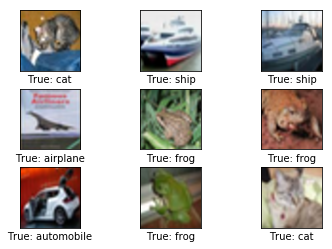

In [951]:
plot_images(images=images, cls_true=cls_true, smooth=True)

In [ ]:
#reshaping the images
print('Original Dimenions..')
print('Training data size- Data,Labels {},{}'.format(images_train.shape,cls_train.shape))
print('Test data size- Data,Labels {},{}'.format(images_test.shape,cls_test.shape))



In [961]:
images_train = images_train.reshape(50000,-1) # -1 indicates reshaping with the leftover dimensions
cls_train = cls_train.reshape(50000,-1)

images_test = images_test.reshape(10000,-1)
cls_test = cls_test.reshape(10000,-1)

print('Post Reshaping Dimenions..')
print('Training data size- Data,Labels {},{}'.format(images_train.shape,cls_train.shape))
print('Test data size- Data,Labels {},{}'.format(images_test.shape,cls_test.shape))

Post Reshaping Dimenions..
Training data size- Data,Labels (50000, 3072),(50000, 1)
Test data size- Data,Labels (10000, 3072),(10000, 1)


<h3>Neural Network Implementation </h3>

In [962]:
number_of_images = 10000;

images_trainset = images_train[:number_of_images].T
len(images_trainset)
labels_trainset = labels_train[:number_of_images]
len(labels_trainset)
images_trainset.shape
#labels_trainset.shape

(3072, 10000)

In [980]:
#Paramters for the neural network
numberOfLayers = 3
neurons_layer_one = 1000
neurons_layer_two = 500
neurons_output_layer = 10;

layer_dim = [images_trainset.shape[0],neurons_layer_one,neurons_layer_two,neurons_output_layer]
parameters = {
}

"""Each activation layer will indicate the number of features of one images i.e 1000 neurons 
in the first hidden layer will have 1000 features per image. matrix would be 10000* num of images
Translating it to a different plane to yield linear models.
second would have 500 features per images

"""

'Each activation layer will indicate the number of features of one images i.e 1000 neurons \nin the first hidden layer will have 1000 features per image. matrix would be 10000* num of images\nTranslating it to a different plane to yield linear models.\nsecond would have 500 features per images\n\n'

In [978]:
class NeuralNetwork:
    
    
    def __init__(self,dimensions):
        self.layer_dimensions = dimensions;
        np.random.seed(1);
        self.parameters = parameters;
        L = len(layer_dim)
        
        for i in range(0,L-1):
            parameters["W"+str(i+1)] = (np.random.randn(dimensions[i+1],dimensions[i])*0.01)
            parameters["b"+str(i+1)] = np.zeros((dimensions[i+1],1)) 
            
                
    def affineForward(self,A_prev,W,b):
        #print('Inside affineForward defn.......')
        Z = np.dot(W,A_prev)+b
        #print('Shape after dot product',Z.shape)
        
        #Z = np.dot(A,W)
        cache = (A_prev,W,b)
        return Z,cache
    
    
    def activationForward(self, A,layer,activation_function="relu"):
        parameters = self.parameters
        W = parameters["W"+str(layer)]
        b = parameters["b"+str(layer)]
        Z,linear_cache = self.affineForward(A,W,b)
        
        #linear_cache is for A,W,b
        #activation_cache is the Z
        #print("Layer,Size of the input,Weight,Bias,Z {},{},{},{},{}".format(layer,A.shape,W.shape,b.shape,Z.shape))
        if(activation_function == "relu"):
            A,activation_cache = relu(Z)
        elif (activation_function == "softmax"):
            A,activation_cache = sigmoid(Z)
        
        cache = (linear_cache,activation_cache)
        return A,cache
        

    def forwardPropagation(self,X):
        
        #print('......Inside forwardPropagation......')
        L = len(self.layer_dimensions)
        A = X
        caches =[]
        #print('Dimension length..',L)
        
        for i in range(1,L-1):
            #print('......Starting layer....',i)
            A_prev = A
            A,cache = self.activationForward(A_prev,i,"relu")         
            caches.append(cache)     
        #print('........Applying softmax to output layer......')
        #To figure out the output layer
        #print('...layer,A,Z..{},{},{}'.format(L-1,A.shape,Z.shape))
        
        Al,cache = self.activationForward(A,L-1,"softmax")
        caches.append(cache)
        #print('Post applying softmax function for layer,Y,Z..{},{},{}'.format(L-1,Al.shape,cache.shape))           
        return Al,caches
    
    def costFunction(self,Al,y):
        Al = Al.T
        m = y.shape[0]
        cost = -(1/m)*((np.sum((y*np.log(Al)))+((1-y)*(np.log(1-Al)))))
        print('...Shape of cost function {}....'.format(cost.shape))
        return cost
    
 #BackPropagation logic begin here
    
    def affineBackward(self,dZ,linear_cache):
        #delta = g'(z) = dZ
        #dZ would represent the g'(z)
        #a=A_prev ; dw3= a.dZ
        
        A_prev,W,b = linear_cache
        m = A_prev.shape[1]
        
        dW = (1/m)*np.dot(dZ,A_prev.T)
        db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
        
        dA_prev = np.dot(W.T,dZ)
        
        return dA_prev,dW,db
        
        
    
    def activationBackward(self, dA, cache,activation_fn):
        linear_cache,activation_cache = cache;
        
        if activation_fn == "relu":
            dZ = relu_gradient(dA,activation_cache)
            dA_prev, dW,db = self.affineBackward(dZ,linear_cache)
        
        elif activation_fn == "sigmoid":
            dZ = sigmoid_gradient(dA,activation_cache)
            dA_prev, dW,db = self.affineBackward(dZ,linear_cache)
            
        
        return dA_prev, dW,db
    
    
    
    def backwardPropagation(self,Al,y,caches):
        L = len(caches)
        #print('Length of cache...',L)
        grads ={}
        dAl = np.divide(Al - y.T, np.multiply(Al, 1 - Al))
        
        #Use different activation function at the last layer
        grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)] = self.activationBackward(dAl,caches[L-1],"sigmoid")
        
        for i in range(L-1,0,-1):
            current_cache = caches[i - 1]
            grads["dA"+str(i-1)],grads["dW"+str(i)],grads["db"+str(i)] = self.activationBackward(grads["dA"+str(i)],current_cache,"relu")
            
        return grads  
    
    # define the function to update both weight matrices and bias vectors
    def update_parameters(self, grads, learning_rate):
        #print(grads)
        parameters = self.parameters
        
        L = len(parameters)
        
       
        for l in range (1,4):
            parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * grads["dW" + str(l)]
            parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * grads["db" + str(l)]
        
        return parameters
         
        
      
    def train(self, X,y, number_of_iterations,learning_rate,activation_fn):
        print('....Training the network for total iteration of of {}'.format(number_of_iterations))
        
        for i in range (1,number_of_iterations):
            print('....Starting Iteration {}..........'.format(i))
            Al,caches = self.forwardPropagation(X);
            Y_pred = Al
            
            print('.......Calculating the cost function.......')
            cost = self.costFunction(Al,y)
            
            print('.......Calculating gradients.......')
            gradients = self.backwardPropagation(Al,y,caches)
            
            print('.......Updating paramaters.......')
            paramters = self.update_parameters(gradients,learning_rate)
            
            
        print('....Training completed....')       
        
        return Y_pred,paramters
    
    
    def predict(self,X):
        y_pred,caches = self.forwardPropagation(X);
        return y_pred
        

In [965]:
len(layer_dim)

4

In [966]:
#Define activation function

def relu(Z):
    A = np.maximum(0,Z)
    return A,Z

def leaky_relu(Z):
    A = np.maximum(0.1*Z,Z)
    return A,Z

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A,Z

def tanh(Z):
    A = (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    return A,Z

def softmax(Z):
    Z = Z.T
    A = (np.exp(Z))/float(sum(np.exp(Z)))
    return A,Z

In [967]:

Z = np.linspace(-10,10,100)
A_sigmoid,z = sigmoid(Z)
A_relu,z = relu(Z)

A_tanh,z = tanh(Z)
A_leaky_relu,z = leaky_relu(Z)
A_softmax,z = softmax(Z)

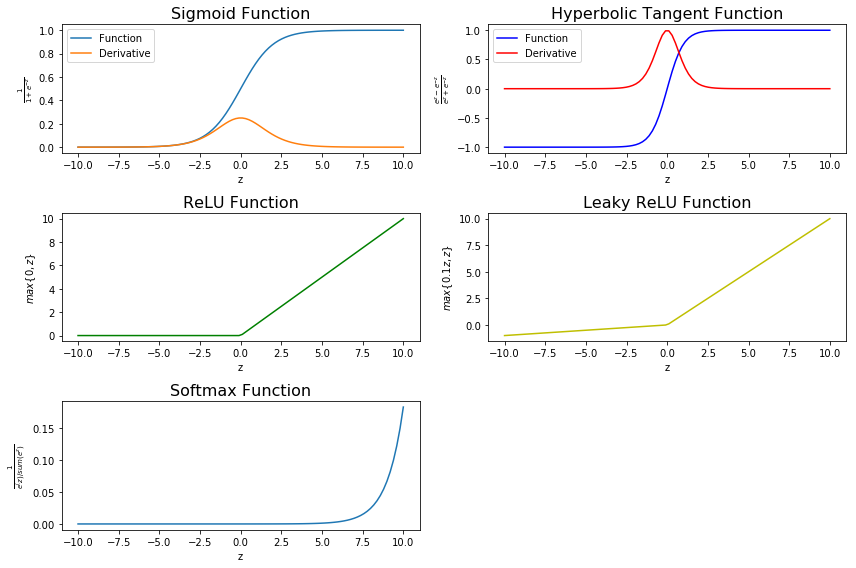

In [896]:
# Plot sigmoid
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.plot(z, A_sigmoid, label = "Function")
plt.plot(z, A_sigmoid * (1 - A_sigmoid), label = "Derivative")
plt.legend(loc = "upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{1}{1 + e^{-z}}$")
plt.title("Sigmoid Function", fontsize = 16)
# Plot tanh
plt.subplot(3, 2, 2)
plt.plot(z, A_tanh, 'b', label = "Function")
plt.plot(z, 1 - np.square(A_tanh), 'r',label = "Derivative")
plt.legend(loc = "upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{e^z - e^{-z}}{e^z + e^{-z}}$")
plt.title("Hyperbolic Tangent Function", fontsize = 16)
# plot relu
plt.subplot(3, 2, 3)
plt.plot(z, A_relu, 'g')
plt.xlabel("z")
plt.ylabel(r"$max\{0, z\}$")
plt.title("ReLU Function", fontsize = 16)
# plot leaky relu
plt.subplot(3, 2, 4)
plt.plot(z, A_leaky_relu, 'y')
plt.xlabel("z")
plt.ylabel(r"$max\{0.1z, z\}$")
plt.title("Leaky ReLU Function", fontsize = 16)

# plot softmax
plt.subplot(3,2,5)
plt.plot(z,A_softmax,label="Function")
plt.xlabel("z")
plt.ylabel(r"$\frac{1}{e^(z)/sum(e^z)}$")
plt.title("Softmax Function", fontsize = 16)

plt.tight_layout();
plt.show()

In [ ]:
# Derivative functions

def sigmoid_gradient(dA,Z):
    A,Z = sigmoid(Z)
    dZ = dA * A * (1-A)
    return dZ


def tanh_gradient(dA, Z):
    A, Z = tanh(Z)
    dZ = dA * (1 - np.square(A))

    return dZ


def relu_gradient(dA, Z):
    A, Z = relu(Z)
    dZ = np.multiply(dA, np.int64(A > 0))

    return dZ
    

In [984]:
model = NeuralNetwork(layer_dim)
print(model.parameters["W1"].shape,model.parameters["W2"].shape,model.parameters["W3"].shape)
print(model.parameters["b1"].shape,model.parameters["b2"].shape,model.parameters["b3"].shape)



(1000, 3072) (500, 1000) (10, 500)
(1000, 1) (500, 1) (10, 1)


In [ ]:
images_trainset.shape

In [985]:
Y_pred,paramters = model.train(images_trainset,labels_trainset,100, 0.03,"relu")

....Training the network for total iteration of of 100
....Starting Iteration 1..........
.......Calculating the cost function.......
...Shape of cost function (10000, 10)....
.......Calculating gradients.......
.......Updating paramaters.......
....Starting Iteration 2..........
.......Calculating the cost function.......
...Shape of cost function (10000, 10)....
.......Calculating gradients.......
.......Updating paramaters.......
....Starting Iteration 3..........
.......Calculating the cost function.......
...Shape of cost function (10000, 10)....
.......Calculating gradients.......
.......Updating paramaters.......
....Starting Iteration 4..........
.......Calculating the cost function.......
...Shape of cost function (10000, 10)....
.......Calculating gradients.......
.......Updating paramaters.......
....Starting Iteration 5..........
.......Calculating the cost function.......
...Shape of cost function (10000, 10)....
.......Calculating gradients.......
.......Updating paramate

In [970]:
Y_score = np.array(Y_pred.T)

In [971]:
Y_pred.shape

(10, 10000)

In [975]:
labels_train[10]
#labels_trainset.shape
#labels_trainset

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
Y_pred = Y_pred.T
Y_pred.shape

In [990]:
#To make predictions
X = images_test
X.shape
X=X.T
X.shape

(3072, 10000)

In [991]:
y_pred = model.predict(X)

In [1000]:
y_pred.shape


(10000, 10)

In [999]:
y_pred = y_pred.T

In [1005]:
y_pred[9000]

array([0.08569407, 0.06439846, 0.07275816, 0.07159504, 0.06707758,
       0.06820336, 0.06615188, 0.06996516, 0.07903937, 0.06541729])

In [986]:
y_labels = labels_test


In [1006]:
y_labels.shape
y_labels[9000]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
# Need to develop predictive model